In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.metrics import peak_signal_noise_ratio
from skimage.util import random_noise

from src import helperfuncs

In [3]:
folderPath = 'C:/My Documents/TUD-MCL/Semester 4/Thesis/Implementation/Data/Dataset-2/' # Maxime/' #sample 2/'
imgName = 'Stack_zeolite4NaAF__111_001_1-10.tif'

imgs = helperfuncs.loadData(folderPath=folderPath, fileName=imgName)

In [7]:
noisy = imgs[0]

# estimate the noise standard deviation from the noisy image
sigma_est = np.mean(estimate_sigma(noisy))
print(f'estimated noise standard deviation = {sigma_est}')

estimated noise standard deviation = 13.540268366800804


In [19]:
patch_kw = dict(patch_size=5,      # 5x5 patches
                patch_distance=6  # 13x13 search area
                )

# slow algorithm
# denoise = denoise_nl_means(noisy, h=1.15 * sigma_est, fast_mode=False,
#                            **patch_kw)

# slow algorithm, sigma provided
denoise2 = denoise_nl_means(noisy, h=1.5 * sigma_est, sigma=sigma_est,
                            fast_mode=False, **patch_kw)

# fast algorithm
# denoise_fast = denoise_nl_means(noisy, h=0.8 * sigma_est, fast_mode=True,
#                                 **patch_kw)

# fast algorithm, sigma provided
# denoise2_fast = denoise_nl_means(noisy, h=0.6 * sigma_est, sigma=sigma_est,
#                                  fast_mode=True, **patch_kw)


(-0.5, 1023.5, 1023.5, -0.5)

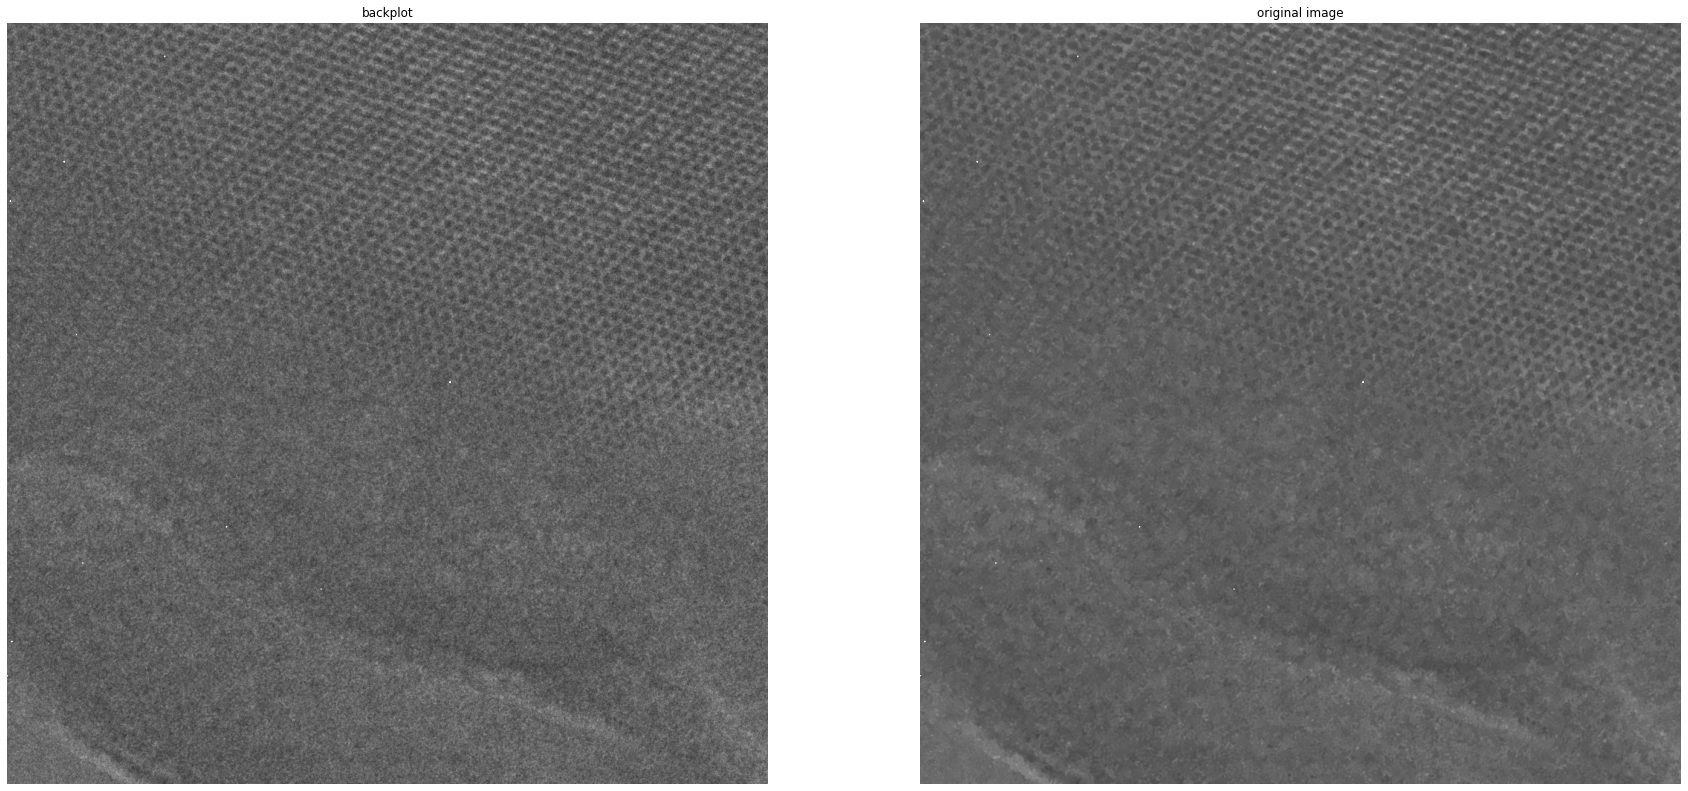

In [20]:
plt.figure(figsize=(2*15, 2*7)) 
ax1=plt.subplot(1,2,1)                    
ax1.imshow(noisy,cmap=plt.cm.gray,vmin=0,vmax=512)
ax1.set_title('backplot')
ax1.axis('off')
ax2=plt.subplot(1,2,2)                    
ax2.imshow(denoise2,cmap=plt.cm.gray,vmin=0,vmax=512)
ax2.set_title('original image')
ax2.axis('off')
#plt.figure(figsize=(15, 12))  
#plt.imshow(overlayclass[Mode][myindex],cmap=plt.cm.gist_rainbow)
#plt.colorbar()
# plt.show()